# Handwriting recognition  <br>

The standard example for machine learning these days is the MNIST data set, a collection of 70,000 handwriting samples of the numbers 0-9.<br>

# Problem statement<br>

To predict which number each handwritten image represents.

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

## Loading data

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
# Normalization of data
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


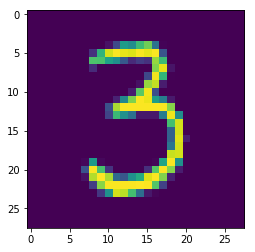

In [10]:
# lets see what the images look like
image = x_train[50, :].reshape((28, 28)) # checking a random row i.e 50 for image

plt.imshow(image)
plt.show()

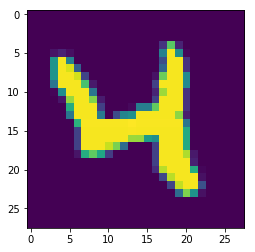

In [12]:
image = x_train[20, :].reshape((28, 28)) # checking a random row i.e 50 for image

plt.imshow(image)
plt.show()

## Modeling RNN

In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [14]:
# adam=adaptive moment estimation ....> one way of optimization
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
#lr=learning rate

## Compiling 

In [15]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [ ]:
# model.summary()

## Training 

In [16]:
history=model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 164s 3ms/step - loss: 0.5490 - acc: 0.8178 - val_loss: 0.1457 - val_acc: 0.9563
Epoch 2/3
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1497 - acc: 0.9587 - val_loss: 0.0783 - val_acc: 0.9761
Epoch 3/3
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1115 - acc: 0.9691 - val_loss: 0.0712 - val_acc: 0.9793


In [17]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.07121549427862046
Test accuracy: 0.9793


**How test accuracy can be higher than training accuracy? It depends. It may be underfitting. We have used dropout for the fear of overfitting and we get underfitting issue. <br>
Having said that, it is not that high and hence, not a serious degree of underfit**